In [11]:
import copy
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt


In [12]:
# value iteration algorithm
class ValueIteration():
    """
    Value Iteration
    - In the paper, the states are represented by 1-based indexing
    - In the code, we will be using 0-based indexing
    """

    def __init__(self, exp_info = {}):
        """Initialization method for the class"""

        # Defining the number of states & actions
        self.num_states  = 4
        self.num_actions = 2
        
        #a=0 :stay
        #a=1 :leave

        # Defining the rewards action dynamic 
        self.rewards = np.array([[3, 2, 1, 0],[2,1,3,10]])         ##########

        # Defining the transition probabilities {p(s'|s, a)}
        temp_0 = np.array([
            [1, 0, 0, 0],
            [0.2, 0.8, 0, 0],
            [0, 0.2, 0.8, 0],
            [0, 0, 0.2, 0.8]
        ])
        
        temp_1 = np.array([
            [0, 0.2, 0.3, 0.5],
            [0.5, 0, 0.5, 0],
            [0, 0.5, 0, 0.5],
            [0, 0.5, 0.5, 0]
        ])
        self.tran_probs = np.ones((2, 4, 4))
        self.tran_probs[0, :, :] = temp_0
        self.tran_probs[1, :, :] = temp_1

        # Defining a random generator
        self.rng = np.random.RandomState(exp_info.get("seed", 0))

        # Defining the experiment parameters
        self.delta     = exp_info.get("delta", 1e-2)
        self.max_iters = exp_info.get("max_iters", 100)
        self.discount  = exp_info.get("discount", 1)

        # Initializing the state values
        self.s_vals = np.zeros(self.num_states)

    def iterate(self):
        """Performs the iterations over the state space"""

        # Initializing some variables
        n = 0
        l_s_vals = []
        temp_delta = self.delta

        while temp_delta >= self.delta and n < self.max_iters:
            temp_delta = 0

            for s in range(self.num_states):
                max_val = 1e-5
                for a in range(self.num_actions):
                    # Calculating the value for a (S, A) pair
                    temp_val = 0
                    for s_prime in range(self.num_states):
                        temp_val += self.tran_probs[a, s, s_prime] * (
                            self.rewards[a][s] + self.discount * self.s_vals[s_prime]
                        )
                    max_val = max(max_val, temp_val)

                temp_delta = max(temp_delta, abs(max_val - self.s_vals[s]))
                self.s_vals[s] = max_val

            n += 1
            l_s_vals.append(copy.deepcopy(self.s_vals))

            ### DEBUG CODE
            # print(temp_delta, self.s_vals)

        return self.s_vals, np.array(l_s_vals)

    #state value for a given policy
    def state_value(self,pi):
        n = 0
        temp_delta = self.delta
        s_value=np.zeros(self.num_states)
        while temp_delta >= self.delta and n < self.max_iters:
            temp_delta = 0
            prev_s_value=s_value
            for s in range(self.num_states):
                temp_stval=prev_s_value[s]
                s_value[s]=0
                
                for a in range(self.num_actions):
                   
                    if(a==pi[s]):
        
                        for s_prime in range(self.num_states):
                            s_value[s] += self.tran_probs[a, s, s_prime] * (
                                self.rewards[a][s] + self.discount *prev_s_value[s_prime]
                            )
    

                temp_delta = max(temp_delta, abs(temp_stval- s_value[s]))

            n += 1

        return s_value
    
    
    
    #finding optimal policy corresponding to the state values
    def finding_policy(self):
        pi =np.array([0,0,0,0])
        for s in range(self.num_states):
            max_val = 1e-5
            for a in range(self.num_actions):
                temp_val = 0
                for s_prime in range(self.num_states):
                                temp_val += self.tran_probs[a, s, s_prime] * (
                                    self.rewards[a][s] + self.discount * self.s_vals[s_prime]
                                )
                        
                if(temp_val>max_val):
                    pi[s]=a
                    max_val=temp_val
        
        return pi
                

In [13]:
# Plot the function
def plot_s_vals_1(l_s_vals):
    # Extracting the required information
    num_iters = len(l_s_vals)
    num_states = len(l_s_vals[0])

    plt.figure(figsize = (10, 5))

    # Plotting the State Values
    for s in range(num_states):
        plt.plot(range(num_iters), l_s_vals[ : , s], label = f"State {s + 1}: {np.round(l_s_vals[-1, s], 3)}")

    plt.xticks(range(0, num_iters, num_iters // 10))
    plt.title(f"Trend of Learnt State Values over Iterations", pad = 10)
    plt.xlabel("Iterations", labelpad = 10)
    plt.ylabel("Learnt State Value", labelpad = 10)
    plt.legend(loc = 'upper left')
    plt.show()


Number of Iterations -> 32


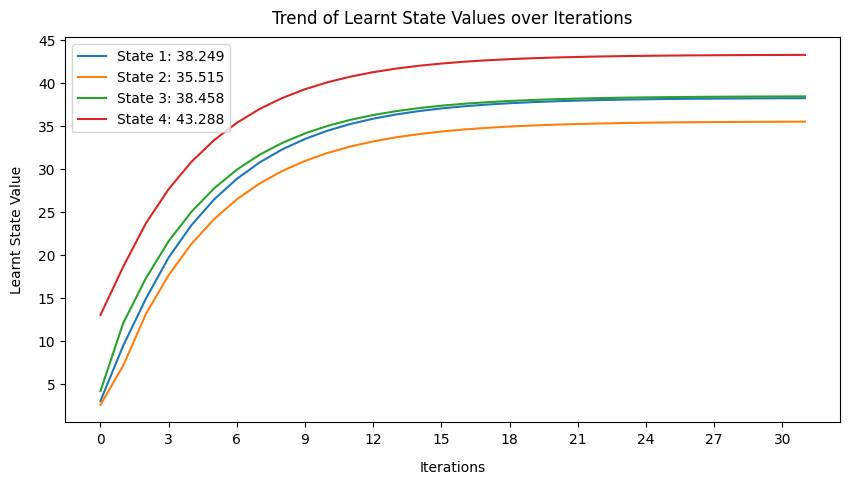

In [14]:
# feed the parameter and run value iteration algorithm
exp_info = {
    'delta': 1e-2,
    'max_iters': 1000,
    'discount': 0.9        
}

env = ValueIteration(exp_info)
s_vals, ValIter_s_vals = env.iterate()
num_iters = len(ValIter_s_vals)
print(f"Number of Iterations -> {num_iters}")

# Plotting the State Values
plot_s_vals_1(ValIter_s_vals)

In [15]:
#finding optimal policy

print(env.finding_policy())

[1 1 1 1]


In [6]:
s_vals

array([38.24920291, 35.51484853, 38.45803203, 43.28779625])

In [7]:
pi_1=[1,1,1,1]

env.state_value(pi_1)

# Part A 
# Question 3

In [8]:
# feed the parameter and intialise the MDP environmnet
exp_info = {
    'delta': 1e-2,
    'max_iters': 100,
    'discount': 0.9        
}
env = ValueIteration(exp_info)

In [9]:
#Finding State Values for a given policy

pi_1=[0,0,0,0]
print(f'State Values for given policy = {env.state_value(pi_1)}')

State Values for given policy = [3.         3.2168     2.13992128 0.66251963]


Number of Iterations -> 32


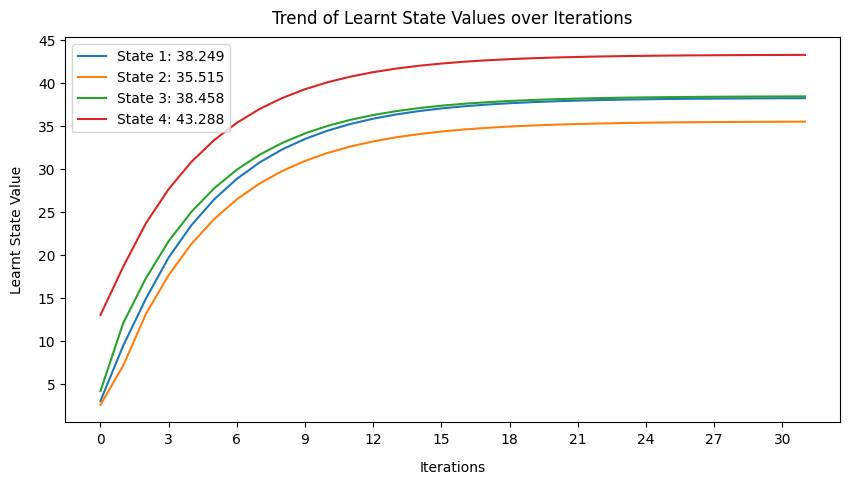

optimal policy : [1 1 1 1]


In [10]:
# Value Iteration Algorithm
s_vals, ValIter_s_vals = env.iterate()
num_iters = len(ValIter_s_vals)
print(f"Number of Iterations -> {num_iters}")

# Plotting the State Values
plot_s_vals_1(ValIter_s_vals)

#finding optimal policy
print(f'optimal policy : {env.finding_policy()}')
